# TrendTracker: Exploring Trending Youtube Videos in Canada

### Notebook Contents

In this notebook, I want to categorize and cluster videos by their features. I want to see which characteristics seem important when deciding what a trending video is.

### Import Libraries and Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [53]:
# New CSV file that includes new features
file = r'/Users/OliverPan/Desktop/youtube_data/trend_features.csv'

In [54]:
trends_kmeans = pd.read_csv(file)

/Users/oliverpan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,6,7,12,13,14,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
trends_kmeans.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,likes_to_dislikes,time_to_trend,youtube_link,no_description,views_per_date
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10.0,2020-08-12,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,...,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,47.983981,1.0,https://www.youtube.com/watch?v=KX06ksuS6Xo,0.0,9140911.0
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353797.0,...,40222.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,134.625951,1.0,https://www.youtube.com/watch?v=J78aPJ3VyNs,0.0,2038853.0
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146740.0,...,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",52.519685,1.0,https://www.youtube.com/watch?v=M9Pmf9AB4Mo,0.0,2381688.0
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156914.0,...,35331.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,26.790849,1.0,https://www.youtube.com/watch?v=3C66w5Z0ixs,0.0,1514614.0
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45803.0,...,2198.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,47.513485,1.0,https://www.youtube.com/watch?v=VIUo6yapDbc,0.0,1123889.0


### Data Cleansing

In [56]:
trends_kmeans.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'likes_to_dislikes', 'time_to_trend',
       'youtube_link', 'no_description', 'views_per_date'],
      dtype='object')

In [57]:
trends_kmeans['channelTitle'].nunique()

2066

In [58]:
# Since we change over 2000 columns to numbers, we need to have a dictionary for reference later
channels = trends_kmeans['channelTitle'].astype('category')

d = dict(enumerate(channels.cat.categories))

channels_df = pd.DataFrame(list(d.items()),columns = ['channelId','channelName']).drop(columns = ['channelId'], axis = 1)
channels_df.head(10)

,channelName
0,#TeamTrees
1,0
2,100 Thieves
3,11Alive
4,1MILLION Dance Studio
5,1Rod1ReelFishing
6,2020 Democratic National Convention
7,20th Century Studios
8,21 Savage
9,24 Heures du Mans


In [59]:
# Pick columns that we can use in kmeans
trends_kmeans = trends_kmeans[['channelTitle', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'likes_to_dislikes', 'time_to_trend', 'no_description', 'views_per_date']]
trends_kmeans['channelTitle'] = trends_kmeans['channelTitle'].astype('category').cat.codes

In [60]:
trends_kmeans.head()

,channelTitle,categoryId,view_count,likes,dislikes,comment_count,likes_to_dislikes,time_to_trend,no_description,views_per_date
0,437,10.0,9140911.0,296541.0,6180.0,30059.0,47.983981,1.0,0.0,9140911.0
1,2000,24.0,2038853.0,353797.0,2628.0,40222.0,134.625951,1.0,0.0,2038853.0
2,105,20.0,2381688.0,146740.0,2794.0,16549.0,52.519685,1.0,0.0,2381688.0
3,217,22.0,1514614.0,156914.0,5857.0,35331.0,26.790849,1.0,0.0,1514614.0
4,1145,26.0,1123889.0,45803.0,964.0,2198.0,47.513485,1.0,0.0,1123889.0


In [61]:
trends_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688853 entries, 0 to 688852
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   channelTitle       688853 non-null  int16  
 1   categoryId         26352 non-null   float64
 2   view_count         25730 non-null   float64
 3   likes              25730 non-null   float64
 4   dislikes           25730 non-null   float64
 5   comment_count      25730 non-null   float64
 6   likes_to_dislikes  21626 non-null   float64
 7   time_to_trend      21778 non-null   float64
 8   no_description     21778 non-null   float64
 9   views_per_date     21778 non-null   float64
dtypes: float64(9), int16(1)
memory usage: 48.6 MB


In [67]:
# Remove NA and Inf values
trends_kmeans = trends_kmeans.replace([np.inf, -np.inf], np.nan)
trends_kmeans.dropna(inplace = True)

### Elbow Method

We need to figure out the number of clusters we want to group into, so we can use elbow method to visualize.

In [68]:
from sklearn.cluster import KMeans 
from sklearn import metrics 

Text(0.5, 1.0, 'Elbow method on cluster_df')

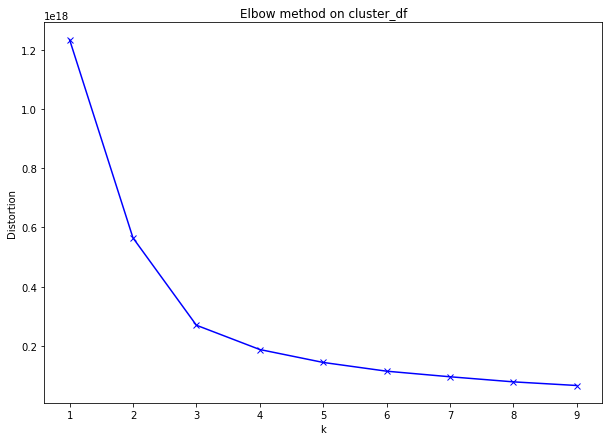

In [69]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(trends_kmeans)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method on cluster_df')

Typically with the elbow method, we want to see where the bend is to identify how many clusters we should use. From here, it seems like 3 clusters is the most optimal.